# Busqueda por Profundidad

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [12]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [13]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.

Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.


Subir el cuaderno con la resolucion.


1. Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

In [41]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image, display

def graficar(conexiones):
    G = nx.DiGraph()
    G.add_nodes_from(conexiones) 
    for valor, listaValor in conexiones.items():
        for a in listaValor:    
            G.add_edge(valor,a,kilometros=str(listaValor[a])+"KM")
        
    plt.figure(figsize=(25,25))  
    pos=nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G,'kilometros')   
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels) 
    nx.draw_networkx(G, pos, node_color = "red", node_size=500, alpha=0.9, labels={node:node for node in G.nodes()})
    plt.show() 
    
    
def graficarResultado(grafo):
    print(result)
    p=nx.drawing.nx_pydot.to_pydot(grafo)
    for i, edge in enumerate(p.get_edges()):
        edge.set_label(str(edge.get_label()))
    plt = Image(p.create_png())
    display(plt)

2. Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


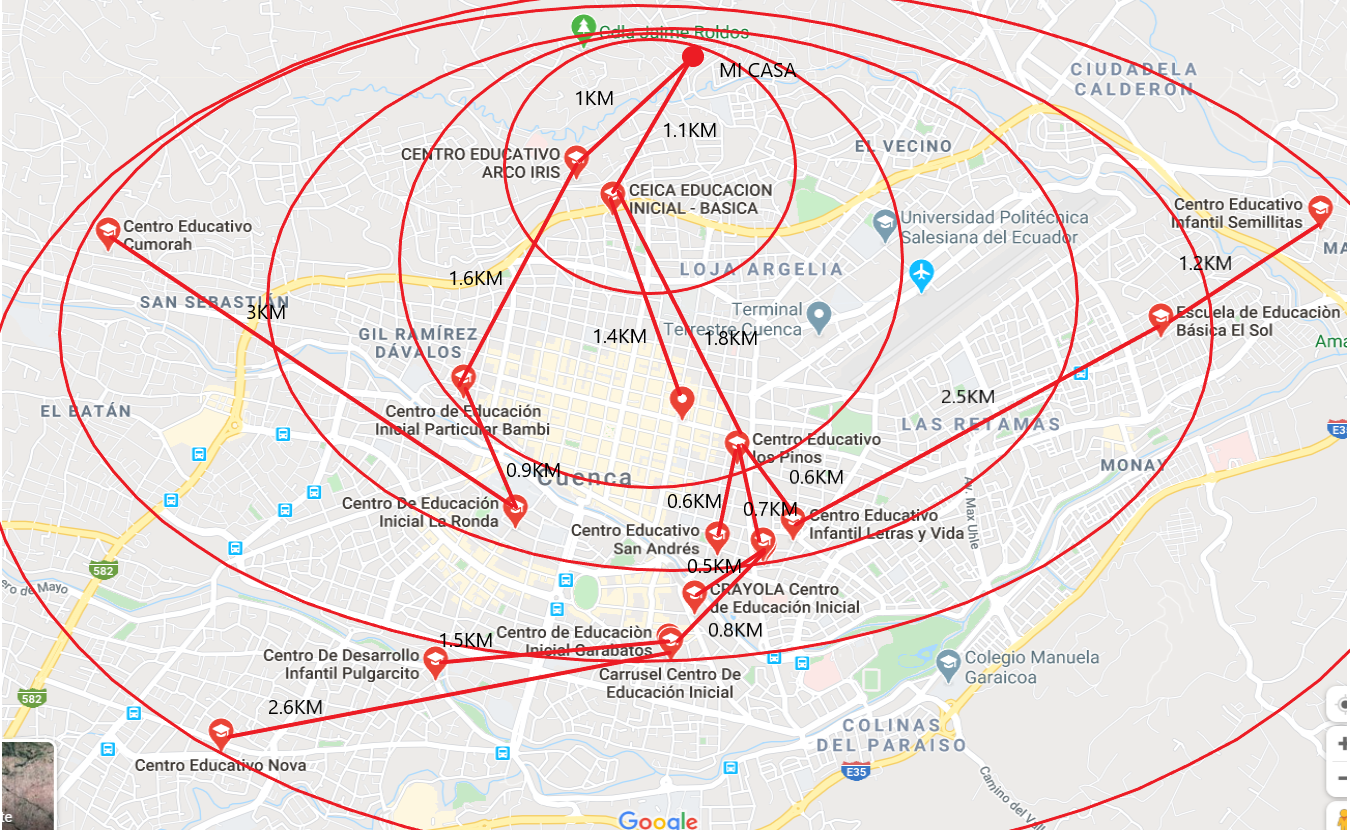

In [104]:
from IPython.display import Image 
Image(filename="CentrosEducativos.png")

In [42]:
def Compare(node):
    return node.cost

CONEXIONES


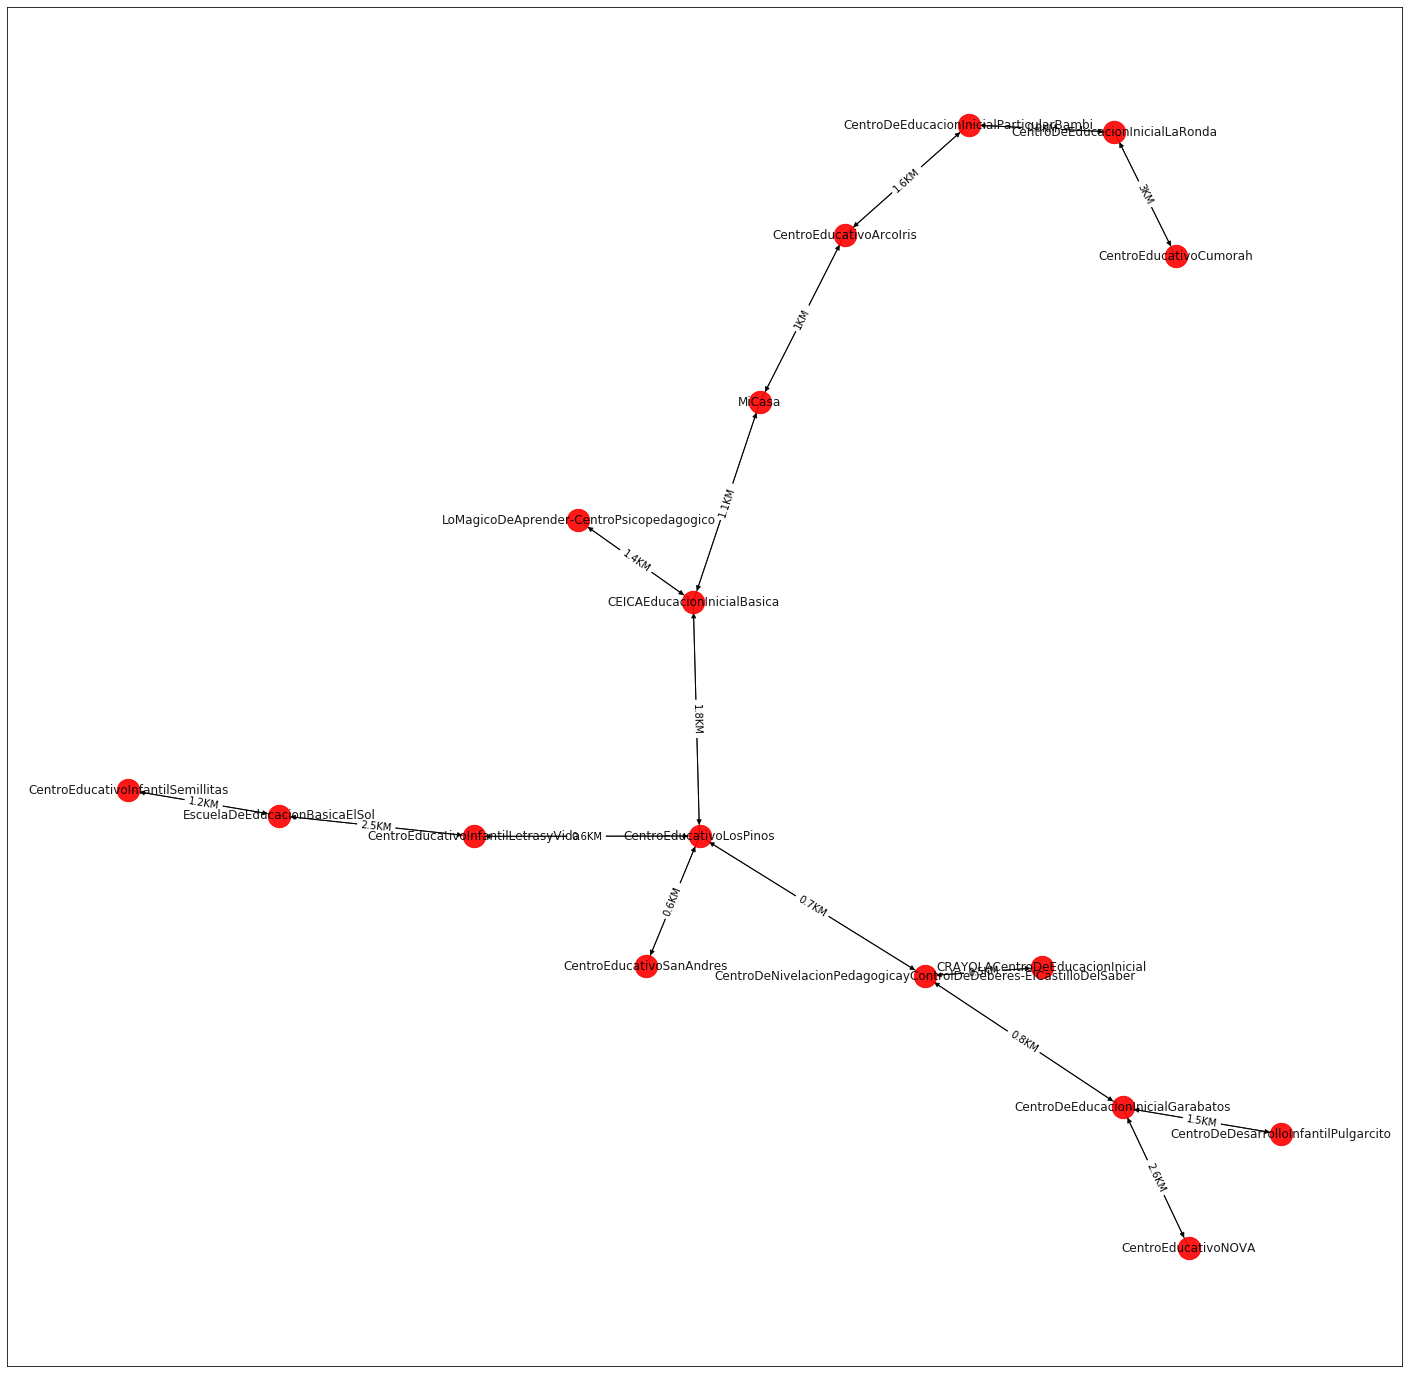

Costo total = 5.3
Resultado Final
['MiCasa', 'CEICAEducacionInicialBasica', 'CentroEducativoLosPinos']


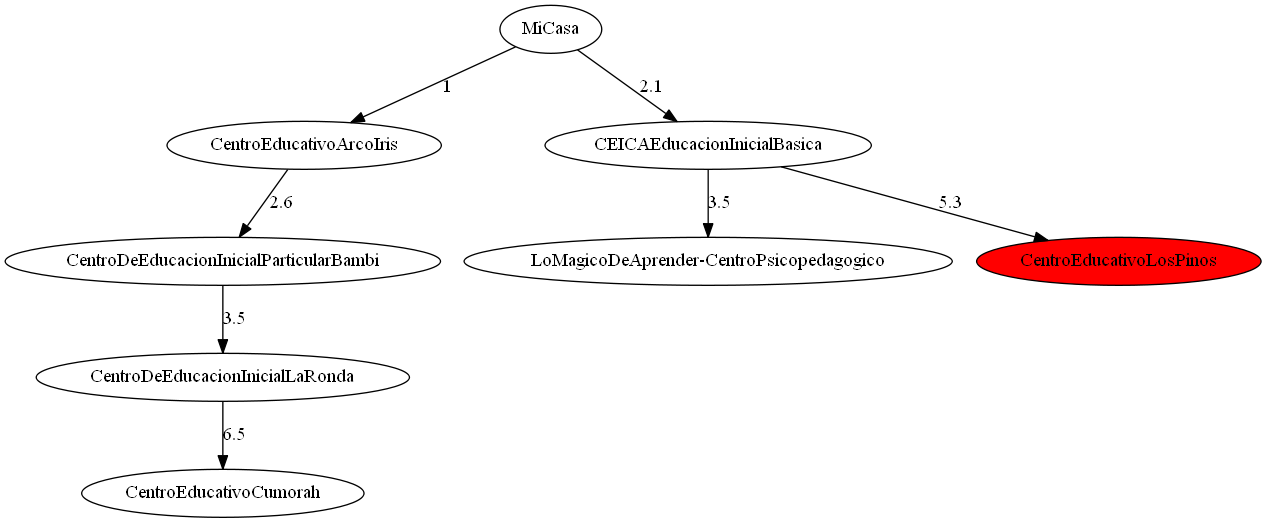

In [99]:

Grafico=nx.DiGraph()
if __name__ == "__main__":
    connections = {
        'MiCasa': {'CentroEducativoArcoIris':1, 'CEICAEducacionInicialBasica':1.1},
        'CentroEducativoArcoIris': {'MiCasa':1, 'CentroDeEducacionInicialParticularBambi':1.6},
        'CEICAEducacionInicialBasica':{'MiCasa':1.1, 'LoMagicoDeAprender-CentroPsicopedagogico':1.4,'CentroEducativoLosPinos':1.8}, 
        'CentroDeEducacionInicialParticularBambi':{'CentroEducativoArcoIris':1.6,'CentroDeEducacionInicialLaRonda':0.9}, 
        'LoMagicoDeAprender-CentroPsicopedagogico':{'CEICAEducacionInicialBasica':1.4},  
        'CentroEducativoLosPinos':{'CEICAEducacionInicialBasica':1.8,'CentroEducativoSanAndres':0.6,'CentroDeNivelacionPedagogicayControlDeDeberes-ElCastilloDelSaber':0.7,'CentroEducativoInfantilLetrasyVida':0.6}, 
        'CentroDeEducacionInicialLaRonda':{'CentroDeEducacionInicialParticularBambi':0.9,'CentroEducativoCumorah':3}, 
        'CentroEducativoSanAndres':{'CentroEducativoLosPinos':0.6}, 
        'CentroDeNivelacionPedagogicayControlDeDeberes-ElCastilloDelSaber':{'CentroEducativoLosPinos':0.7,'CRAYOLACentroDeEducacionInicial':0.5,'CentroDeEducacionInicialGarabatos':0.8}, 
        'CentroEducativoInfantilLetrasyVida':{'CentroEducativoLosPinos':0.6,'EscuelaDeEducacionBasicaElSol':2.5}, 
        'CentroEducativoCumorah':{'CentroDeEducacionInicialLaRonda':3},
        'CRAYOLACentroDeEducacionInicial':{'CentroDeNivelacionPedagogicayControlDeDeberes-ElCastilloDelSaber':0.5},  
        'CentroDeEducacionInicialGarabatos':{'CentroDeNivelacionPedagogicayControlDeDeberes-ElCastilloDelSaber':0.8,'CentroDeDesarrolloInfantilPulgarcito':1.5,'CentroEducativoNOVA':2.6}, 
        'EscuelaDeEducacionBasicaElSol':{'CentroEducativoInfantilLetrasyVida':2.5,'CentroEducativoInfantilSemillitas':1.2},
        'CentroDeDesarrolloInfantilPulgarcito':{'CentroDeEducacionInicialGarabatos':1.5}, 
        'CentroEducativoNOVA':{'CentroDeEducacionInicialGarabatos':2.6}, 
        'CentroEducativoInfantilSemillitas':{'EscuelaDeEducacionBasicaElSol':1.2}
    } 

def search_profundidad(init_node, solution, visited,coste,con,g):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        print("Costo total = " +str(coste)) 
        g.add_node(init_node.data,style='filled',fillcolor='red')
        return init_node # Retorno el nodo resultado
    else: 
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list=[]
        for node in con[node_data]: 
            child = Node(node)
            cost = con[node_data][node] 
            child.cost =cost
            child_list.append(child)
        child_list = sorted(child_list, key=Compare) 
        init_node.set_child(child_list)
        
        
        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva   
                coste = coste+node_son.cost  
                g.add_edge(init_node.data,node_son,label=coste)
                Solution = search_profundidad(node_son, solution, visited,coste,con,g) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        
        return None
           

print("CONEXIONES")
graficar(connections)
        
init_state = 'MiCasa' # Creamos un estado inicial
solution =  'CentroEducativoLosPinos' # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)  
coste = 0 
node = search_profundidad(init_node, solution, visited,coste,connections,Grafico) # Llamamos la metodo de busqueda
# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
 
print("Resultado Final")  
graficarResultado(Grafico)

In [95]:
global reinas
reinas = 4
tablero = [0, 0, 0, 0],  [0, 0, 0, 0],  [0, 0, 0, 0], [0, 0, 0, 0]

def resolverNReinas(tablero): 
  
    if resolverReinasRecursivo(tablero, 0) == False: 
        print ("Solution does not exist") 
        return False 
    else: 
        for i in range(reinas): 
            for j in range(reinas): 
                print (tablero[i][j], end = " ") 
            print()
        return True 
    
def resolverReinasRecursivo(tablero, columna): 
    if columna >= reinas: 
        return True
    for i in range(reinas): 
  
        if verificarReinasTablero(tablero, i, columna):             
            tablero[i][columna] = 1  
            if resolverReinasRecursivo(tablero, columna + 1) == True: 
                return True 
            tablero[i][columna] = 0
    return False
    
        
def verificarReinasTablero(tablero, fila, columna): 
    for i in range(columna): 
        if tablero[fila][i] == 1: 
            return False
    for i, j in zip(range(fila, -1, -1),  
                    range(columna, -1, -1)): 
        if tablero[i][j] == 1: 
            return False
    for i, j in zip(range(fila, reinas, 1),  
                    range(columna, -1, -1)): 
        if tablero[i][j] == 1: 
            return False
    return True

  
resolverNReinas(tablero)

0 0 1 0 
1 0 0 0 
0 0 0 1 
0 1 0 0 


True

# Conclusiones

- Se puede concluir que se  ha realizado la practica de manera correcta utilizando el metodo de profundidad.   
- Se ha realizado de manera correcta un arbol jerarquico con todos los posibles Centros educativos. Y hemos utilizado el metodo de profundidad para poder hacer la busqueda en este arbol
- Se ha realizado el metodo para poder poner 4 reinas en un tablero de ajedrez de manera correcta. 
